In [1]:
from allthethings import *
import numpy as np
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
fi = "indata/3pipes1.inp"     #location of .inp file
fc = "indata/3pipes1.config"  #location of .config file
mtype = 1                     #which model is used along network edges. 1 for Preissman Slot. 0 for uniform
n1 = PyNetwork(fi, fc, mtype) #a network object
print n1 
n1.showLayout()               #print the layout of the network


Network at address 0x105d8dcb0 with 4 nodes and 3 edges

   pipe | start node | end node
-----------------------------------
     0  |  0         | 1
     1  |  1         | 2
     2  |  1         | 3


   node | #incoming pipes
-------------------------
  0     |  1
  1     |  3
  2     |  1
  3     |  1


In [3]:
#n1.showCurrentData()      #show the values of dynamical variables in each pipe
q0 = np.random.rand(50);
a0 = np.zeros(50)
#print n1.Ns

In [4]:
n1.setIC(1,q0,a0)
#n1.showCurrentData()

0.2


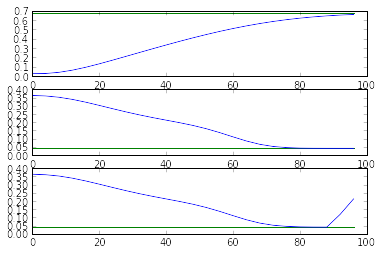

In [3]:
qi = [n1.q(i) for i in range(n1.Nedges)]  #this is a list of np.ndarrays pointing to underlying pipe data(!)
fig,ax = plt.subplots(nrows = n1.Nedges)
for k in range(n1.Nedges):
    x = np.arange(0,n1.Ls[k], n1.Ls[k]/n1.Ns[k])
    ax[k].plot(x,qi[k][0:n1.Ns[k]],'g')
dt = n1.T/n1.M
print dt
n1.runForwardProblem(dt)  #solve up to time T
for k in range(n1.Nedges):
    x = np.arange(0,n1.Ls[k], n1.Ls[k]/n1.Ns[k])
    ax[k].plot(x,qi[k][0:n1.Ns[k]],'b')
plt.show()

In [6]:
#n1.showCurrentData()